# Prepared data as given the problem 8.13 in eChapter

In [1]:
import numpy as np
import matplotlib.pyplot as plt
X1_pos = [-0.494,-0.311,-0.0064, -0.0089, 0.0014, -0.189, 0.085, 0.171, 0.142]
X2_pos = [0.363, -0.101,0.374,-0.173, 0.138, 0.718, 0.32208, -0.302, 0.568]
X1_neg = [0.491, -0.892, -0.721, 0.519, -0.775, -0.646, -0.803, 0.944, 0.724, -0.748, -0.635]
X2_neg = [0.920, -0.946, -0.710, -0.715, 0.551, 0.773, 0.878, 0.801, -0.795, -0.853, -0.905]

In [2]:
data1 = [np.array([1, X1_pos[i], X2_pos[i], 1]) for i in range(len(X1_pos))]
data2 = [np.array([1, X1_neg[i], X2_neg[i], -1]) for i in range(len(X2_neg))]
data = data1 + data2

## Linear Regression from chapter as said in the problem

In [3]:
#Linear Regression Algorithm
class LinearRegression(object):
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.W_lin = np.zeros(len(X[0]))
        self.X_pinv = np.zeros(len(X[0]))
        
    def fit(self):
        self.X_pinv = np.linalg.pinv(self.X)
        self.W_lin = np.dot(self.X_pinv, self.y)

## Fitting the data and calculating the weight vector

In [4]:
X = np.array(data)[:,0:3]
y = np.array(data)[:, 3:4]
lr = LinearRegression(X, y)
lr.fit()
print("Weight Vector in Linear Regression: ", lr.W_lin)

Weight Vector in Linear Regression:  [[-0.08038683]
 [ 0.21692172]
 [ 0.32166285]]


## Function for getting 2 or 3 degree polynomial tranformed features as specified in the paramater of the function

In [5]:
from sklearn.preprocessing import PolynomialFeatures
#degree = 2
#X_new = np.array(data)[:,1:3]
#poly = PolynomialFeatures(degree)
#X_transformed = poly.fit_transform(X_new)
#y_same = np.array(data)[:, 3:4]


def getNOrderDegreePolynomial(degree,data):
    X_new = np.array(data)[:,1:3]
    poly = PolynomialFeatures(degree)
    X_transformed = poly.fit_transform(X_new)
    return X_transformed

## Degree 2 polynomial feature transform

In [6]:
X_transformed = getNOrderDegreePolynomial(2,data)
y_same = np.array(data)[:, 3:4]
lr_degree_2 = LinearRegression(X_transformed, y_same)
lr_degree_2.fit()
print("Weight Vector in Linear Regression for degree 2 transformation: ", lr_degree_2.W_lin)

Weight Vector in Linear Regression for degree 2 transformation:  [[ 1.14961198]
 [-0.10009075]
 [ 0.21215591]
 [-1.81091994]
 [ 0.39858406]
 [-1.68097968]]


## Plotting part(a) - degree 2 feature transform

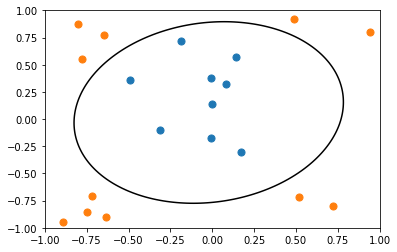

In [7]:
w = lr_degree_2.W_lin
xlist = np.linspace(-1.0, 1.0,100)
ylist = np.linspace(-1.0, 1.0,100) 
X,Y = np.meshgrid(xlist, ylist)
F = w[0]+w[1]*X+w[2]*Y+w[3]*X*X+w[4]*X*Y+w[5]*Y*Y
#+w[6]*X*X*X+w[7]*X*X*Y+w[8]*X*Y*Y+w[9]*Y*Y*Y 
plt.contour(X, Y, F, [0], colors = 'k', linestyles = 'solid')
plt.scatter(X1_pos,X2_pos,s = 50)
plt.scatter(X1_neg,X2_neg,s = 50)
plt.show()

## Degree 3 polynomial feature transform

In [8]:
X_transformed = getNOrderDegreePolynomial(3,data)
y_same = np.array(data)[:, 3:4]
lr_degree_3 = LinearRegression(X_transformed, y_same)
lr_degree_3.fit()
print("Weight Vector in Linear Regression for degree 3 transformation: ", lr_degree_3.W_lin)

Weight Vector in Linear Regression for degree 3 transformation:  [[ 1.20049635]
 [ 0.41859423]
 [ 0.86257666]
 [-0.8558055 ]
 [ 0.09649896]
 [-2.52929745]
 [ 2.03371711]
 [-2.01400123]
 [-2.46888369]
 [ 0.45110276]]


## Plotting part(a) - degree 3 feature transform

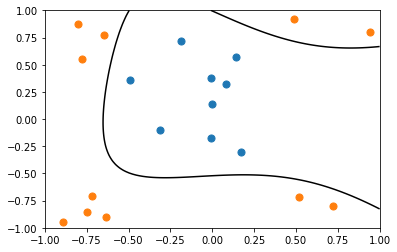

In [9]:
w = lr_degree_3.W_lin
xlist = np.linspace(-1.0, 1.0,100)
ylist = np.linspace(-1.0, 1.0,100) 
X,Y = np.meshgrid(xlist, ylist)
F = w[0]+w[1]*X+w[2]*Y+w[3]*X*X+w[4]*X*Y+w[5]*Y*Y+w[6]*X*X*X+w[7]*X*X*Y+w[8]*X*Y*Y+w[9]*Y*Y*Y 
plt.contour(X, Y, F, [0], colors = 'k', linestyles = 'solid')
plt.scatter(X1_pos,X2_pos,s = 50)
plt.scatter(X1_neg,X2_neg,s = 50)
plt.show()

## Part (b) - The degree 3 feature transform seems to be overfitting the data and we can overcome this by regularizing with lambda = 1 using Ridge Classifier

In [10]:
from sklearn import linear_model
reg = linear_model.Ridge (alpha = 1)

In [11]:
reg.fit(X_transformed, y_same)
print("Weight Vector in Linear Regression for degree 3 transformation: ", reg.coef_)

Weight Vector in Linear Regression for degree 3 transformation:  [[ 0.          0.00601632  0.35540549 -1.20091513  0.13074219 -1.27147296
   0.1696081  -0.27683785 -0.11390554 -0.0964036 ]]


## Part (c) using lambda = 1 regularizing the hypothesis to get the optimum weight and this avoids the overfitting

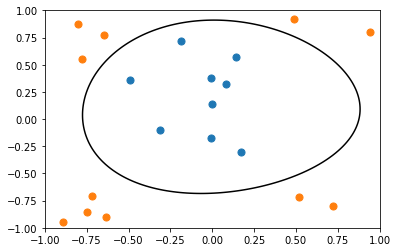

In [12]:
w = reg.coef_[0]
xlist = np.linspace(-1.0, 1.0,100)
ylist = np.linspace(-1.0, 1.0,100) 
X,Y = np.meshgrid(xlist, ylist)
F = reg.intercept_[0]+w[1]*X+w[2]*Y+w[3]*X*X+w[4]*X*Y+w[5]*Y*Y+w[6]*X*X*X+w[7]*X*X*Y+w[8]*X*Y*Y+w[9]*Y*Y*Y 
plt.contour(X, Y, F, [0], colors = 'k', linestyles = 'solid')
plt.scatter(X1_pos,X2_pos,s = 50)
plt.scatter(X1_neg,X2_neg,s = 50)
plt.show()

## Part (d) - Using SVM we need no regularization so without using lambda we get the normal fit even for higher order feature transform and our SVM depends on the number of support vectors and not the entire dataset 

In [13]:
from sklearn import svm
clf = svm.SVC(kernel='linear', C = 1.0)

In [14]:
clf.fit(X_transformed,y_same)

/Users/sarathchandra/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [15]:
print(clf.coef_[0])
W = clf.coef_[0]
b = clf.intercept_[0]
print("b = ", b)

[ 0.          0.07651595  0.38289483 -1.78414461  0.1759623  -1.83835729
  0.46317519 -0.25330453 -0.02526551 -0.11259218]
b =  1.121314152224968


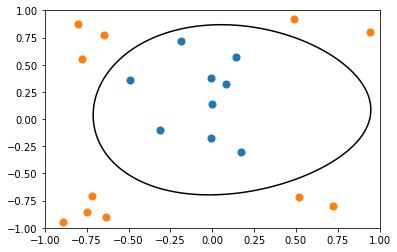

In [16]:
w = W
xlist = np.linspace(-1.0, 1.0,100)
ylist = np.linspace(-1.0, 1.0,100) 
X,Y = np.meshgrid(xlist, ylist)
F = b+w[1]*X+w[2]*Y+w[3]*X*X+w[4]*X*Y+w[5]*Y*Y+w[6]*X*X*X+w[7]*X*X*Y+w[8]*X*Y*Y+w[9]*Y*Y*Y 
plt.contour(X, Y, F, [0], colors = 'k', linestyles = 'solid')
plt.scatter(X1_pos,X2_pos,s = 50)
plt.scatter(X1_neg,X2_neg,s = 50)
plt.show()